In [1]:
from data import get_data, filter_fundamentals
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

idx = pd.IndexSlice

In [2]:
columns = ["sharefactor", "sharesbas", "pe"]
data = get_data(columns)
data = filter_fundamentals(data)

In [21]:
data = data[data["pe"] > 0]
data["return"] = data["closeadj"].groupby("ticker").pct_change()
data["return"] = data["return"].groupby("ticker").shift(-1)
data = data.dropna()

In [22]:
def make_factor(df, factor_col):
    top_decile = df[factor_col] > np.percentile(df[factor_col], 90)
    bottom_decile = df[factor_col] < np.percentile(df[factor_col], 10)
    return np.mean(df[top_decile]["return"]) - np.mean(df[bottom_decile]["return"])

In [23]:
test = data.groupby("date").apply(lambda x: make_factor(x, "pe"))

<AxesSubplot:xlabel='date'>

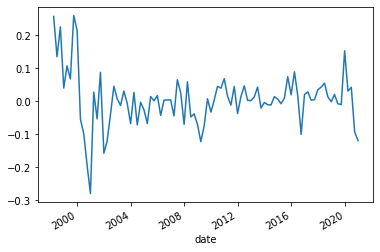

In [24]:
test.plot()

In [25]:
test.mean()

0.005400026723740169